In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from descartes import PolygonPatch
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
from map import main

In [2]:
PATH_TO_PARCEL_GEO = "Data/all_parcels_geo.csv"
PATH_TO_DUMMY = "Data/violation_dummy.csv"
PATH_TO_GEO_VIOLATIONS = "Data/violation_geo.csv"
PATH_TO_MOI = "/mnt/data/economic_development/MLPPLab-Cincinnati/LAB/data_for_maps.csv"
PATH_TO_MODELS = "/mnt/data/economic_development/MLPPLab-Cincinnati/LAB/data_for_postgres.csv"

## Mapping Models
This function converts each model dataframe into a GeoDataFrame and separates the predicted parcels from a given model, color coding True Positives as 'blue', False Positives as 'yellow' in order to see various types of accuracy clustering.

On Model 585b727bba2d6c3d2e2ed65e with precision of 0.988399515584
On Model 585b6413ba2d6c3d2e2ed518 with precision of 0.997078808662
On Model 585b6bdaba2d6c3d2e2ed5d0 with precision of 0.996117369996
On Model 5846fef4073a8c8e7de97729 with precision of 0.98321064187


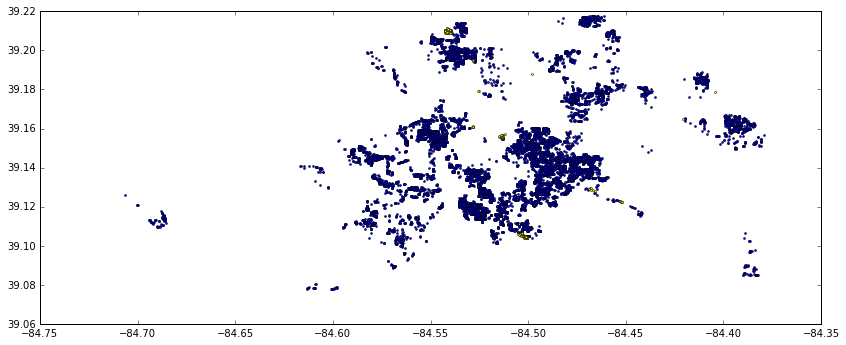

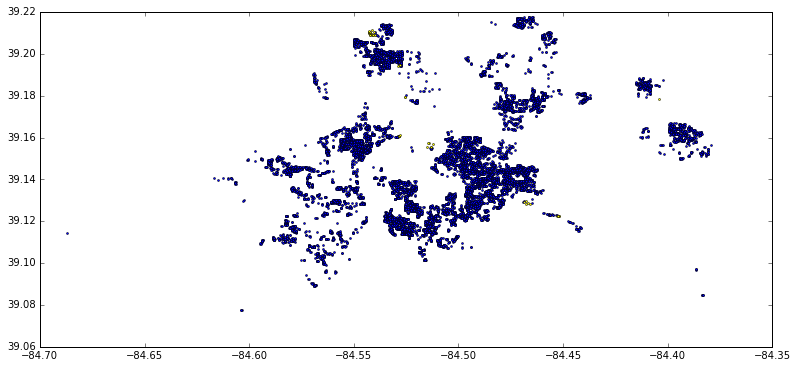

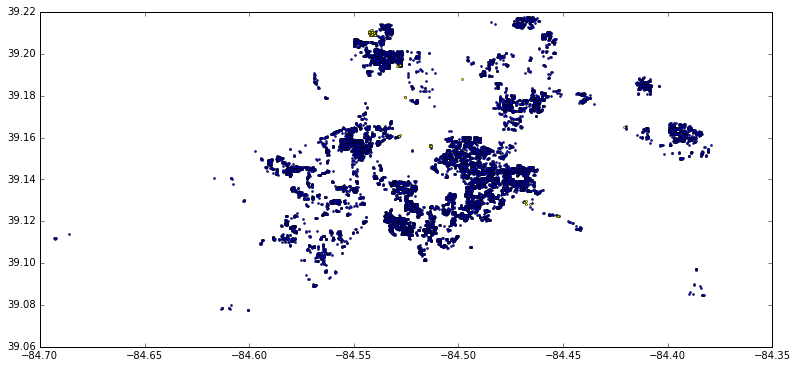

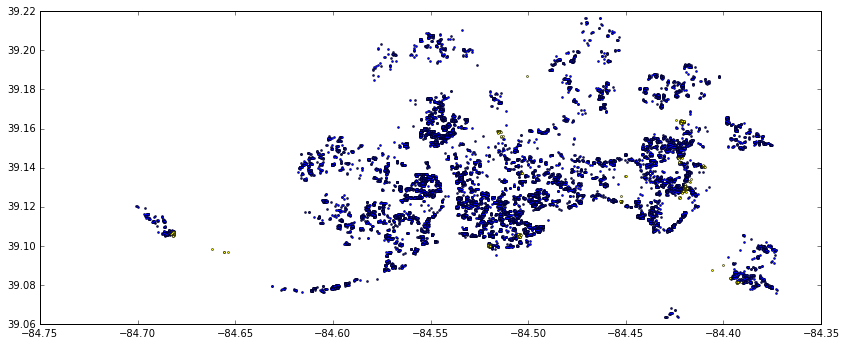

In [22]:
list_of_dfs, model_names = main(PATH_TO_MODELS, PATH_TO_GEO_VIOLATIONS, PATH_TO_DUMMY, PATH_TO_MOI, False)
for idx, df in enumerate(list_of_dfs):
    crs = {'init': 'epsg:4326'}
    geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
    geo_df = GeoDataFrame(df, crs=crs, geometry=geometry)
    TP = geo_df.loc[geo_df["TP_dummy"]== 1]
    FP = geo_df.loc[geo_df["TP_dummy"]== 0]
    precision = float(TP.shape[0])/(float(TP.shape[0]) + float(FP.shape[0]))
    print ("On Model {} with precision of {}".format(model_names[idx], precision))
    tp = TP.plot(color='blue', figsize=(14,6))
    FP.plot(ax=tp, color='yellow', (figsize)=(14,6))